Pearson Correlation: 0.46 (p-value: 0.0000)
Spearman Correlation: 0.44 (p-value: 0.0000)


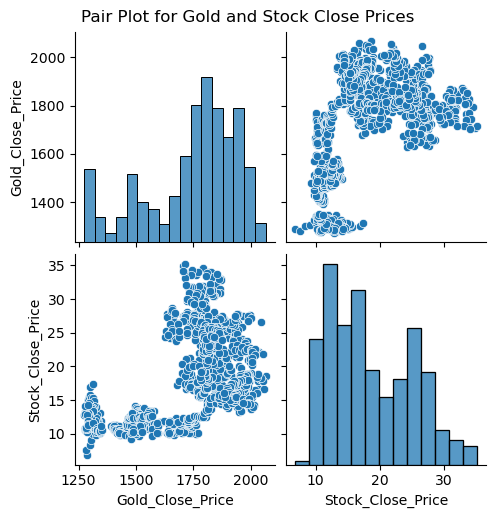

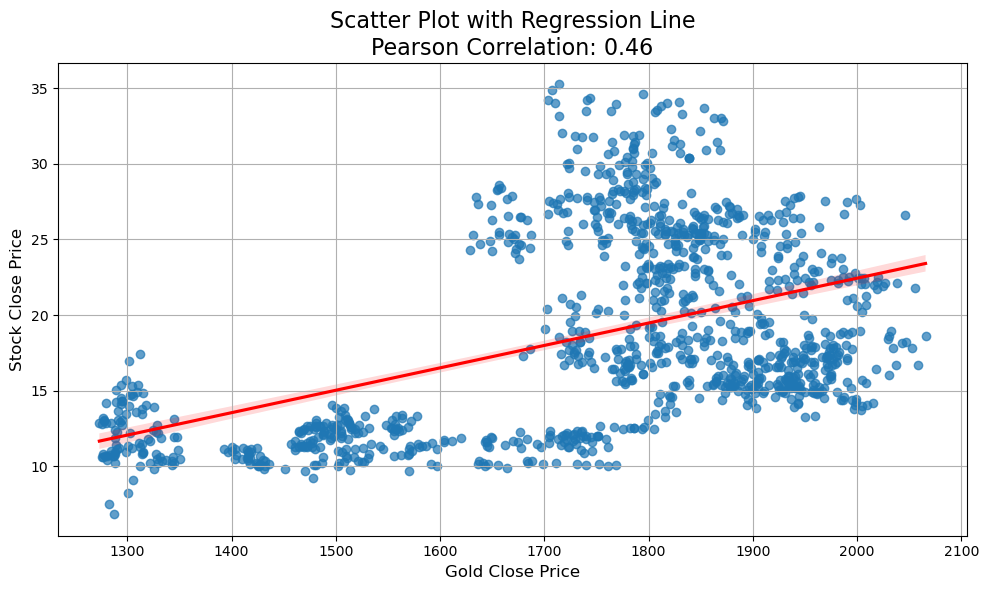

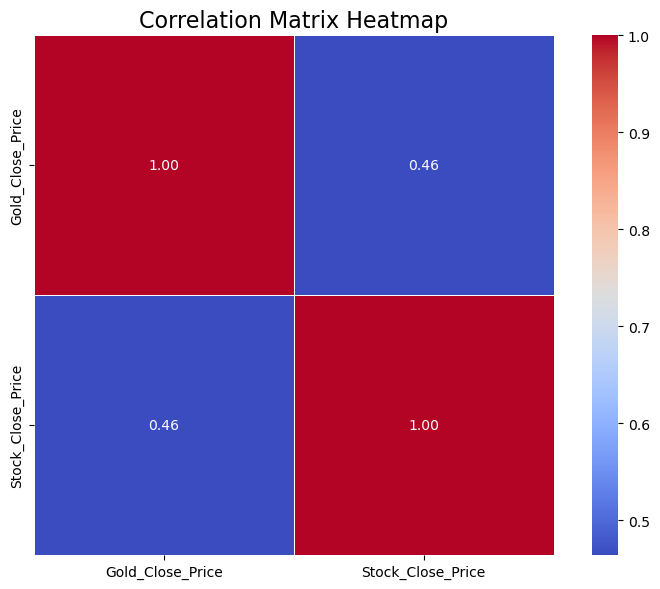

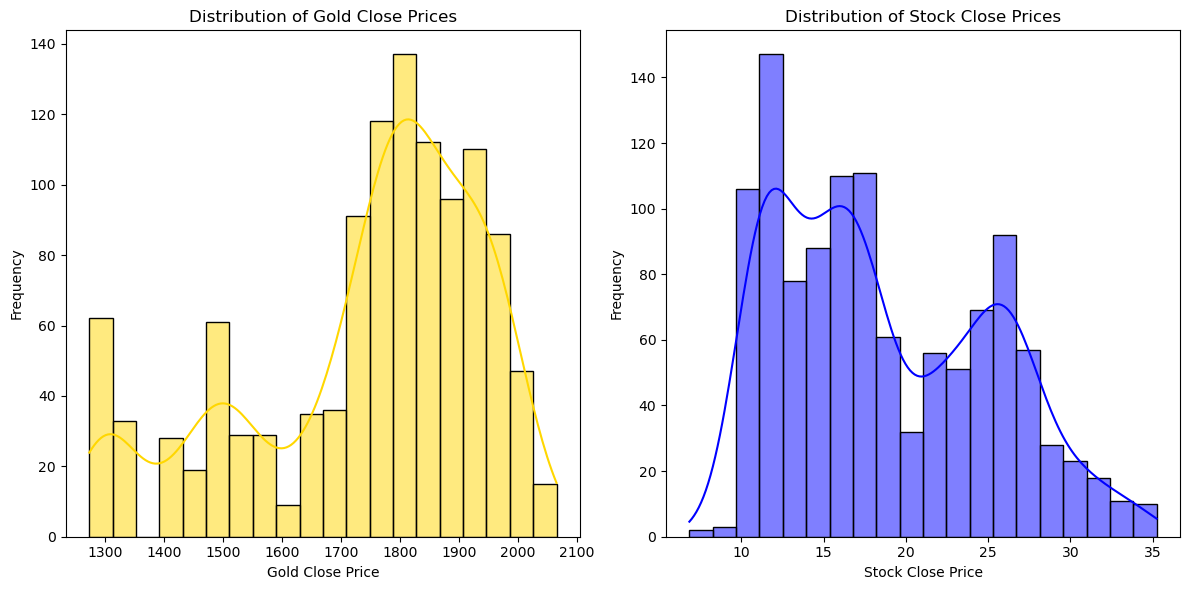

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Load the dataset
file_path = 'closePricesData3.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Ensure data is sorted by date
df = df.sort_values(by='Date')

# Calculate Pearson and Spearman correlation coefficients
pearson_corr, pearson_p = pearsonr(df['Gold_Close_Price'], df['Stock_Close_Price'])
spearman_corr, spearman_p = spearmanr(df['Gold_Close_Price'], df['Stock_Close_Price'])

# Print correlation results
print(f"Pearson Correlation: {pearson_corr:.2f} (p-value: {pearson_p:.4f})")
print(f"Spearman Correlation: {spearman_corr:.2f} (p-value: {spearman_p:.4f})")

# Pair plot for detailed variable relationships
sns.pairplot(df[['Gold_Close_Price', 'Stock_Close_Price']])
plt.suptitle("Pair Plot for Gold and Stock Close Prices", y=1.02)
plt.show()

# Scatter plot with linear regression fit
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Gold_Close_Price',
    y='Stock_Close_Price',
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.7}
)
plt.title(f"Scatter Plot with Regression Line\nPearson Correlation: {pearson_corr:.2f}", fontsize=16)
plt.xlabel("Gold Close Price", fontsize=12)
plt.ylabel("Stock Close Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = df[['Gold_Close_Price', 'Stock_Close_Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

# Histogram for distribution analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Gold_Close_Price'], kde=True, color='gold', bins=20)
plt.title("Distribution of Gold Close Prices")
plt.xlabel("Gold Close Price")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df['Stock_Close_Price'], kde=True, color='blue', bins=20)
plt.title("Distribution of Stock Close Prices")
plt.xlabel("Stock Close Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
